In [1]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.circuit.library import Diagonal

n_qubits = 3          
N = 2**n_qubits
L = 1.0              
D = 1.0              
t = 1.0               
x = 1.0               

phi = x * D * t * (2 * np.pi / L)**2

j = np.arange(N) #from 0 to N-1

k_squared = np.where(j < N/2, j**2, (j - N)**2)

unitary_diag = np.exp(-1j * phi * k_squared)

qc = QuantumCircuit(n_qubits)

evolution_gate = Diagonal(unitary_diag)

qc.append(evolution_gate, range(n_qubits))

print("Diagonal Operator Entries:")
print(np.round(unitary_diag, 3))

print("\nCircuit Diagram:")
print(qc)

Diagonal Operator Entries:
[ 1.   +0.j    -0.207-0.978j  0.672-0.741j -0.954+0.301j -0.981+0.193j
 -0.954+0.301j  0.672-0.741j -0.207-0.978j]

Circuit Diagram:
     ┌───────────┐
q_0: ┤0          ├
     │           │
q_1: ┤1 Diagonal ├
     │           │
q_2: ┤2          ├
     └───────────┘


/tmp/ipykernel_21634/2677257778.py:22: DeprecationWarning: The class ``qiskit.circuit.library.generalized_gates.diagonal.Diagonal`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. Use DiagonalGate instead.
  evolution_gate = Diagonal(unitary_diag)


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit.library import Diagonal
from qiskit.quantum_info import Statevector

# --- 1. SETUP PARAMETERS ---
n_qubits = 3
N = 2**n_qubits
L = 1.0

# Define the Hamiltonian (k^2) diagonal
j_indices = np.arange(N)
k_squared = np.where(j_indices < N/2, j_indices**2, (j_indices - N)**2)
Hamiltonian_diag = (2 * np.pi / L)**2 * k_squared

# --- 2. LCHS PARAMETERS ---
# NOTE: 0.5 * (exp(ix) + exp(-ix)) = cos(x). 
# This specific setup creates a Cosine of the operator, not a pure exponential decay.
# To get pure decay, you would need Gaussian coefficients (Hubbard-Stratonovich).
coeffs = [0.5, 0.5]      
times  = [0.1, -0.1]     

# --- 3. BUILD THE CIRCUIT ---
reg_a = QuantumRegister(1, 'ancilla') 
reg_s = QuantumRegister(n_qubits, 'system')
qc = QuantumCircuit(reg_a, reg_s)

# A) PREPARE (Ancilla Superposition)
qc.h(reg_a[0]) 

# B) SELECT (Controlled-Hamiltonian Simulation)
# We use list(reg_s) to ensure we target the system qubits correctly

# -- Construct U0 (triggered on 0) --
U0_diag = np.exp(-1j * Hamiltonian_diag * times[0])
gate_U0 = Diagonal(U0_diag).control(1, ctrl_state=0) 
qc.append(gate_U0, [reg_a[0]] + list(reg_s))  # <--- FIXED HERE

# -- Construct U1 (triggered on 1) --
U1_diag = np.exp(-1j * Hamiltonian_diag * times[1])
gate_U1 = Diagonal(U1_diag).control(1, ctrl_state=1) 
qc.append(gate_U1, [reg_a[0]] + list(reg_s))  # <--- FIXED HERE

# C) UN-PREPARE
qc.h(reg_a[0])

print("LCU Circuit Constructed Successfully.")
qc.draw() # Uncomment to see the diagram

LCU Circuit Constructed Successfully.


/tmp/ipykernel_21634/3968421268.py:37: DeprecationWarning: The class ``qiskit.circuit.library.generalized_gates.diagonal.Diagonal`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. Use DiagonalGate instead.
  gate_U0 = Diagonal(U0_diag).control(1, ctrl_state=0)
/tmp/ipykernel_21634/3968421268.py:42: DeprecationWarning: The class ``qiskit.circuit.library.generalized_gates.diagonal.Diagonal`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. Use DiagonalGate instead.
  gate_U1 = Diagonal(U1_diag).control(1, ctrl_state=1)


┌───┐┌─────────────┐┌─────────────┐┌───┐
 ancilla: ┤ H ├┤0            ├┤0            ├┤ H ├
          └───┘│             ││             │└───┘
system_0: ─────┤1            ├┤1            ├─────
               │  c_Diagonal ││  c_Diagonal │     
system_1: ─────┤2            ├┤2            ├─────
               │             ││             │     
system_2: ─────┤3            ├┤3            ├─────
               └─────────────┘└─────────────┘

In [15]:
from qiskit import QuantumCircuit
import numpy as np
from qiskit.circuit.library import QFTGate, StatePreparation
from qiskit.quantum_info import Statevector
from qiskit import QuantumCircuit
import numpy as np
import matplotlib.pyplot as plt

n_qubits=3


qcQFT = QFTGate(n_qubits)
qcIQFT = QFTGate(n_qubits).inverse()


x = np.linspace(0,2**n_qubits-1,2**n_qubits)
print(x)
state = np.zeros(2**n_qubits)
state[3] = 1
state = state/np.linalg.norm(state,2)

stateprep = StatePreparation(state)
circuit = QuantumCircuit(n_qubits+1)
circuit.compose(stateprep, qubits=range(1,n_qubits+1), inplace=True)
circuit.append(qcQFT, range(1,n_qubits+1))

circuit.compose(qc,inplace=True)
circuit.append(qcIQFT, range(1,n_qubits+1))
circuit.draw()

final_state = Statevector.from_instruction(circuit)


[0. 1. 2. 3. 4. 5. 6. 7.]


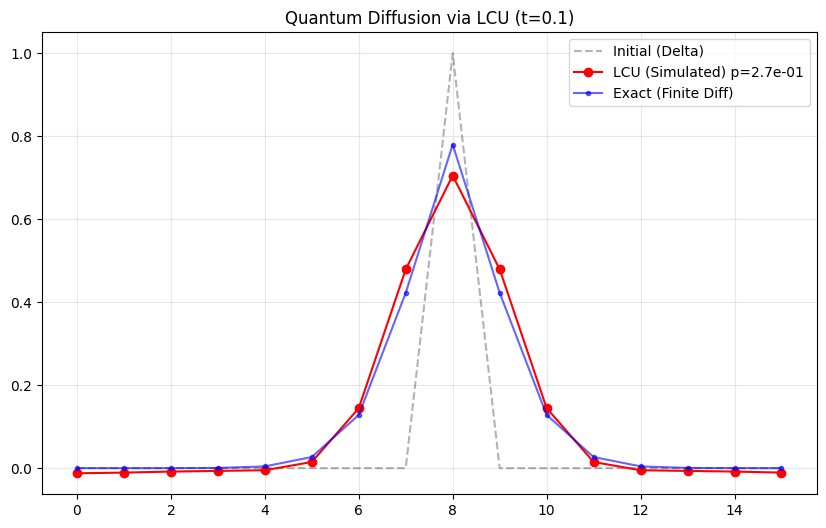

Success Probability: 0.2743


In [27]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.circuit.library import DiagonalGate, QFTGate, StatePreparation
from qiskit.quantum_info import Statevector
from scipy.linalg import expm

n_qubits = 4
N = 2**n_qubits
L = 2* np.pi              
t = 0.1            
final_time = t    
J = 10            

j_indices = np.arange(N)
k_indices = np.where(j_indices <= N/2, j_indices, j_indices - N)
Hamiltonian_diag = (2 * np.pi / L)**2 * (k_indices**2)

# LCU terms
num_terms = 64
n_ancilla = int(np.ceil(np.log2(num_terms)))

useGL = True 
if useGL:
    [x, w] = np.polynomial.legendre.leggauss(num_terms)
    x = J * x
    w = J * w
    weights = 1 / (1 + x**2)
    weights = weights * w
else:
    # Uniform trapezoidal-like
    x = np.linspace(-J, J, num_terms)
    dx_int = x[1] - x[0]
    weights = 1 / (1 + x**2) * dx_int

# LCU coeffs are sqrt(probability)
weights = weights / np.sum(weights) 
coeffs = np.sqrt(weights)           

reg_a = QuantumRegister(n_ancilla, 'ancilla') 
reg_s = QuantumRegister(n_qubits, 'system')
lc_qc = QuantumCircuit(reg_a, reg_s)
prep_gate = StatePreparation(coeffs)
lc_qc.append(prep_gate, reg_a)
for i in range(num_terms):
    U_diag = np.exp(-1j * final_time * Hamiltonian_diag * x[i])
    ctrl_str = format(i, f'0{n_ancilla}b') 
    gate = DiagonalGate(U_diag).control(n_ancilla, ctrl_state=ctrl_str)
    lc_qc.append(gate, list(reg_a) + list(reg_s))
lc_qc.append(prep_gate.inverse(), reg_a)



circuit = QuantumCircuit(n_ancilla + n_qubits)
# Initialize System
state = np.zeros(N)
state[int(N/2)] = 1
stateprep = StatePreparation(state / np.linalg.norm(state))
circuit.append(stateprep, range(n_ancilla, n_ancilla + n_qubits))

circuit.append(QFTGate(n_qubits), range(n_ancilla, n_ancilla + n_qubits))
circuit.compose(lc_qc, inplace=True)
circuit.append(QFTGate(n_qubits).inverse(), range(n_ancilla, n_ancilla + n_qubits))

final_state = Statevector(circuit)
full_data = np.array(final_state)

# Post-selection: Measure Ancilla = |0...0>
system_state = full_data[0::2**n_ancilla]

# Normalize
success_prob = np.linalg.norm(system_state)**2
final = system_state / np.linalg.norm(system_state)
probs = np.abs(final)**2

# Finite Difference
dx = L / N
A = (np.diag(-2 * np.ones(N)) + 
     np.diag(1 * np.ones(N - 1), 1) + 
     np.diag(1 * np.ones(N - 1), -1))
# Periodic BCs
A[0, N - 1] = 1
A[N - 1, 0] = 1
A = A / (dx**2)

exact_final = expm(A * final_time) @ state
exact_final = exact_final / np.linalg.norm(exact_final)

plt.figure(figsize=(10, 6))
plt.plot(np.arange(N), state, 'k--', label='Initial (Delta)', alpha=0.3)
plt.plot(np.arange(N), final.real, 'ro-', label=f'LCU (Simulated) p={success_prob:.1e}') # Use .real
plt.plot(np.arange(N), exact_final, 'b.-', label='Exact (Finite Diff)', alpha=0.6)
plt.title(f"Quantum Diffusion via LCU (t={t})")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"Success Probability: {success_prob:.4f}")